In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from PIL import Image
import shutil
import pandas as pd
import cv2
from IPython.display import clear_output
import os
from sklearn import preprocessing
import matplotlib.patches as patches
import time
from sklearn.decomposition import PCA

# For resizing Danlo data from 640x480 to 640x512

In [ ]:
im = Image.open("/Volumes/Samsung_T5/Danilo_data/IR/All-Frames-Simple/00056.png")
plt.imshow(im,cmap='gray')

im3=cv2.resize(np.array(im), (640,512), interpolation = cv.INTER_CUBIC)

plt.imshow(im)

# Create Dataset

In [2]:
Haak1_true_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight1/Haak1_true_annot.csv')
Haak1_anomalies_object_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight1/Haak1_ano_object_annot.csv')
Haak1_anomalies_land_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight1/Haak1_ano_land_annot.csv')

Haak3_true_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/Haak3_true_annot.csv')
Haak3_anomalies_object_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/Haak3_ano_object_annot.csv')
Haak3_anomalies_land_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/Haak3_ano_land_annot.csv')

Danilo_true_df = pd.read_csv(r'/Volumes/Samsung_T5/Danilo_data/IR/Danilo_true_annot.csv')
Danilo_anomalies_land_df = pd.read_csv(r'/Volumes/Samsung_T5/Danilo_data/IR/Danilo_ano_land_annot.csv')
Empty_df = pd.read_csv(r'/Volumes/Samsung_T5/Danilo_data/IR/Empty.csv')

In [3]:
# Haak - Flight 1
Haak1_true_train       = Haak1_true_df.sample(frac = 0.7, random_state = 100)
Haak1_true_test        = Haak1_true_df.drop(Haak1_true_train.index)

Haak1_ano_object_train = Haak1_anomalies_object_df.sample(frac = 0.7, random_state = 100)
Haak1_ano_object_test  = Haak1_anomalies_object_df.drop(Haak1_ano_object_train.index)

Haak1_ano_land_train   = Haak1_anomalies_land_df.sample(frac = 0.7, random_state = 100)
Haak1_ano_land_test    = Haak1_anomalies_land_df.drop(Haak1_ano_land_train.index)
 
# Haak - Flight 1
Haak3_true_test        = Haak3_true_df
Haak3_ano_object_test  = Haak3_anomalies_object_df
Haak3_ano_land_test    = Haak3_anomalies_land_df

# Danilo
Danilo_true_test       = Danilo_true_df
Danilo_ano_land_test   = Danilo_anomalies_land_df
empty                  = Empty_df

In [126]:
Danilo_ano_land_test

,Unnamed: 0,file,x,y,w,h
0,102,00056.png,0,0,640,480
1,163,00057.png,394,151,246,329
2,62,00058.png,0,0,205,77
3,134,00059.png,120,0,18,31
4,97,00060.png,82,0,13,29
...,...,...,...,...,...,...
199,146,00683.png,187,0,17,46
200,190,00684.png,0,0,213,96
201,136,00685.png,0,0,211,67
202,42,00686.png,198,0,14,18


# PCA NEEDS ALL DATA AT THE SAME TIME IN TRAIN - remember this random order

In [154]:
#directory = '/Volumes/Samsung_T5/Haak_data/Flight1/20170926_norm_1100-3900/'
directory = '/Volumes/Samsung_T5/Danilo_data/IR/All-Frames-Simple/'
df = Danilo_ano_land_test
n_files = len(df)

train_imgs = []

j = 0
for i, file in df.iterrows():
    j += 1
    print(str(j) + '/' + str(n_files), end='\r')
    file = str(file[1]).split('.')[0][:] + '.png'
    img = np.array(Image.open(os.path.join(directory, file)))
    train_imgs = [*train_imgs, img]
    
train_imgs = np.array(train_imgs)
print(train_imgs.shape)

(502, 480, 640)


In [146]:
#train_imgs = []
#train_imgs_flat = []
#X = []

In [155]:
len(train_imgs)
train_imgs_flat = train_imgs.reshape(len(train_imgs),-1)
X = train_imgs_flat
print(X.shape)

20
100

(502, 307200)


100

In [156]:
from sklearn.decomposition import PCA
import time
%matplotlib inline

start_time = time.time()

X = train_imgs_flat
X_PCA = PCA(n_components = 25).fit(X)

print("--- %s seconds ---" % (time.time() - start_time))

#components = 25
#X = train_imgs_flat
#X_PCA = PCA(n_components = 3).fit(X)

--- 9.53176498413086 seconds ---


In [157]:
X[0:1].shape

(1, 307200)

In [160]:
np.cumsum(X_PCA.explained_variance_ratio_[:10])

array([0.42887817, 0.64315197, 0.72169508, 0.76049433, 0.78906319,
       0.81327419, 0.83013712, 0.84397792, 0.85565349, 0.86454944])

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

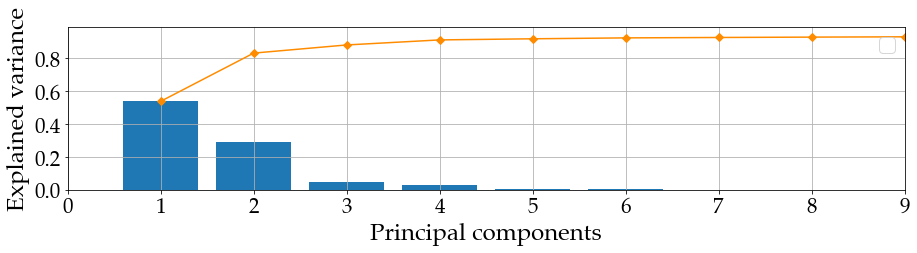

In [151]:
#########
# F1
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
import matplotlib.patheffects as pe
import numpy as np
from scipy.integrate import simps
from numpy import trapz
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
plt.figure().clear()
plt.close()
plt.cla()
plt.clf()

fig, ax = plt.subplots(figsize=(15, 3))
fontsize = 24
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
plt.grid(True)

plt.bar(np.arange(1,components+1),X_PCA.explained_variance_ratio_[:components])
plt.plot(np.arange(1,components+1), np.cumsum(X_PCA.explained_variance_ratio_[:components]),
         color="darkorange", marker="D")


plt.xlim((0,9))
#plt.ylim((0.001,0.155))
plt.xlabel('Principal components', fontsize=fontsize, fontname='Palatino')
plt.ylabel('Explained variance', fontsize=fontsize, fontname='Palatino')
plt.xticks(fontsize=fontsize-3, fontname='Palatino')
plt.yticks(fontsize=fontsize-3, fontname='Palatino')

#ax.set_yscale('log')
frame1 = plt.gca()
#frame1.axes.xaxis.set_ticklabels([])
#frame1.axes.yaxis.set_ticklabels([])

plt.legend(fontsize=fontsize, prop={'size':fontsize-4, 'family': 'Palatino'})
#plt.title('Histogram of IQ')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)

plt.savefig('/Users/ola/Documents/Masteroppgave/Figures/PCA_pareto_F3_ResultsDisc.pdf', bbox_inches='tight')

plt.show()

In [ ]:
# For later?
'''
true_imgs_rescale = []
ano_object_imgs_rescale = []
ano_land_imgs_rescale = []

files = len(os.listdir(directory))
loops = files

a = 0
b = 0
c = 0
for i, file in enumerate(os.listdir(directory)[:loops]):
    print(str(i) + '/' + str(files), end='\r')

    file_png = file.split('.')[0][1:] + '.png'
    isAnomObject = anomalies_object_df['Anomalies_object'].str.contains(file_png).sum()
    isAnomLand   = anomalies_land_df['Anomalies_land'].str.contains(file_png).sum()
    isTrue       = anomalies_true_df['True'].str.contains(file_png).sum()
    
    if isTrue:
        img = true_imgs[a]
        img = cv2.resize(img,(int(img.shape[1] / 2), int(img.shape[0] / 2)))
        true_imgs_rescale = [*true_imgs_rescale, img]
        a = a + 1
    
    if isAnomObject:
        img = ano_object_imgs[b]
        img = cv2.resize(img,(int(img.shape[1] / 2), int(img.shape[0] / 2)))
        ano_object_imgs_rescale = [*ano_object_imgs_rescale, img]
        b = b + 1
        
    if isAnomLand:
        img = ano_land_imgs[c]
        img = cv2.resize(img,(int(img.shape[1] / 2), int(img.shape[0] / 2)))
        ano_land_imgs_rescale = [*ano_land_imgs_rescale, img]
        c = c + 1
        
true_imgs_rescale       = np.array(true_imgs_rescale)
ano_object_imgs_rescale = np.array(ano_object_imgs_rescale)
ano_land_imgs_rescale   = np.array(ano_land_imgs_rescale)
'''

# TRAIN

In [ ]:
Haak1_img_dir = '/Volumes/Samsung_T5/Haak_data/Flight1/20170926_norm_1100-3900/'
Haak3_img_dir = '/Volumes/Samsung_T5/Haak_data/Flight3/20170926_norm_1100-3900/'
Danilo_img_dir = '/Volumes/Samsung_T5/Danilo_data/IR/All-Frames-Simple/'
n_component = 3
threshold_mask = 5


test_sets = [[Haak1_img_dir,  Haak1_true_test,  Haak1_ano_object_test,  Haak1_ano_land_test],
             [Haak3_img_dir,  Haak3_true_test,  Haak3_ano_object_test,  Haak3_ano_land_test],
             [Danilo_img_dir, Danilo_true_test, Danilo_ano_land_test,   empty]]

# Train with all train data - aggregate to numpy 3D object
train_data = Haak1_true_train[:5000]
train_imgs_3D = []
for file in train_data['file']:
    img = np.array(Image.open(os.path.join(Haak1_img_dir, file)))
    train_imgs_3D = [*train_imgs_3D, img]
train_imgs_3D = np.array(train_imgs_3D)

# Test
for i, (img_dir, true_test, object_test, land_test) in enumerate(test_sets):
    print('##### Test set: {} #####'.format(i+1))
    
    PCA_model = PCA(n_components = n_component).fit(train_imgs_3D)

    run_PCA(PCA_model, threshold_mask, img_dir,
                 Haak1_true_validate, Haak1_ano_object_train, Haak1_ano_land_train)

train_imgs_3D = []

# TEST

In [5]:
anomalies_object_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/Anomalies_object.csv')
anomalies_land_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/Anomalies_land.csv')
anomalies_all_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/Anomalies_all.csv')
anomalies_true_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/True.csv')

directory = '/Volumes/Samsung_T5/Haak_data/Flight3/20170926_full-norm/' # 14-bit

true_imgs = []
ano_object_imgs = []
ano_land_imgs = []

files = len(os.listdir(directory))
loops = files

for i, file in enumerate(os.listdir(directory)[:loops]):
    print(str(i) + '/' + str(files), end='\r')

    file_png = file.split('.')[0][1:] + '.png'
    isAnomObject = anomalies_object_df['Anomalies_object'].str.contains(file_png).sum()
    isAnomLand   = anomalies_land_df['Anomalies_land'].str.contains(file_png).sum()
    isTrue       = anomalies_true_df['True'].str.contains(file_png).sum()
    
    '''
    if isTrue:
        img = np.array(Image.open(os.path.join(directory, file)))
        true_imgs = [*true_imgs, img]
    
    '''
    if isAnomObject:
        img = np.array(Image.open(os.path.join(directory, file)))
        ano_object_imgs = [*ano_object_imgs, img]
        
    if isAnomLand:
        img = np.array(Image.open(os.path.join(directory, file)))
        ano_land_imgs = [*ano_land_imgs, img]
     
        
true_imgs       = np.array(true_imgs)
ano_object_imgs = np.array(ano_object_imgs)
ano_land_imgs   = np.array(ano_land_imgs)

# Evaluation Helper-functions

In [ ]:
def covering_rectangle_from_square_boxes(boxes):
    output = np.array([])
    
    if len(boxes):
        x_left = np.min(boxes[:,0])
        width = np.max(boxes[:,0] + boxes[:,2] - x_left)
        y_top = np.min(boxes[:,1])
        height = np.max(boxes[:,1] + boxes[:,3] - y_top)
        
        output = np.array([[x_left, y_top, width, height]])

    return output

def intersection_info(box_i, box_j):
    # NMS
    x_left_i, y_upper_i, w_i, h_i = box_i
    x_right_i = x_left_i + w_i
    y_lower_i = y_upper_i + h_i
    area_i = w_i*h_i

    x_left_j, y_upper_j, w_j, h_j = box_j
    x_right_j = x_left_j + w_j
    y_lower_j = y_upper_j + h_j
    area_j = w_j*h_j

    x_left  = max(x_left_i, x_left_j)
    y_upper = max(y_upper_i, y_upper_j)

    x_right = min(x_right_i, x_right_j)
    y_lower = min(y_lower_i, y_lower_j)

    w_intersec = max(0, x_right - x_left)
    h_intersec = max(0, y_lower - y_upper)

    intersection_area = w_intersec*h_intersec
    union_area = area_i + area_j - intersection_area
    IoU = intersection_area / union_area
    
    return list([x_left, y_upper, w_intersec, h_intersec, intersection_area, union_area, IoU, area_i, area_j])

def compare_predictions_with_truth(pred_boxes, true_boxes):
    
    intersection_boxes = []
    match_found_pred = np.ones(len(pred_boxes))
    match_found_true = np.ones(len(true_boxes))
    
    for i, box_pred in enumerate(pred_boxes):
        for j, box_true in enumerate(true_boxes):
                     
            x_left, y_upper, w_intsc, h_intsc, A_intsc, A_union, IoU, A_pred, A_true  = intersection_info(box_pred, box_true)
            
            if IoU >= 0.1:
                match_found_pred[i] = 0
                match_found_true[j] = 0
                intersection_boxes = [*intersection_boxes, [x_left, y_upper, w_intsc, h_intsc]]
            
            elif (IoU >= 0.05) and ((A_intsc>=A_pred) or (A_intsc>=A_true)):
                match_found_pred[i] = 0
                match_found_true[j] = 0
                intersection_boxes = [*intersection_boxes, [x_left, y_upper, w_intsc, h_intsc]]
            
            
    intersection_boxes = np.array(intersection_boxes)
        
    false_positives = match_found_pred.sum()
    false_negatives = match_found_true.sum()
    true_positives  = len(match_found_true) - false_negatives
                
    return intersection_boxes, false_positives, false_negatives, true_positives

def boxes_from_mask(mask, area_threshold):
    
    contours, hierarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, 2)
    
    # Threshold by area
    contours_areathrsh = []
    for cnt in contours:
        if cv2.contourArea(cnt) > area_threshold:
            contours_areathrsh = [*contours_areathrsh, cnt]
    contours_areathrsh = np.array(contours_areathrsh)
    
    # combine boxes thresholded
    boxes = []
    for i, cnt in enumerate(contours_areathrsh):
        box = cv2.boundingRect(cnt)
        boxes = [*boxes, box]
    boxes = np.array(boxes)

    return boxes

def plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title):
    colors = ['r', 'c', 'g', 'b', 'y', 'm']
    
    clear_output(wait=True)
    fig = plt.figure(figsize=(21,10))

    # Plot boxes - Area thresholded
    plt.subplot(1,2,1)
    plt.imshow(mask, cmap='gray')
    ax = plt.gca()
    
    plt.subplot(1,2,2)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    ax = plt.gca()

    for i, box in enumerate(intersection_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='y', facecolor='y', fill=True, linewidth=2, alpha=0.25)
        ax.add_patch(rect)     
    
    for i, box in enumerate(pred_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='r', fill=False, linewidth=2)
        ax.add_patch(rect)
        
    for i, box in enumerate(true_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='g', fill=False, linewidth=2)
        ax.add_patch(rect)           
        
     
    fig.suptitle(title + ' | Found: {}, Truth: {}'.format(len(pred_boxes), len(true_boxes)), fontsize=18)
    plt.show()

In [ ]:
def run_edge_detection(threshold_mask, gaussian_mask, img_dir, true_df, object_df, land_df):
    
    #####################################################
    area_threshold = 9
    
    testObjects = True
    testLand = True
    testTrue = True
    
    doPlots = True
    #####################################################

    files = os.listdir(img_dir)
    n_files = len(files)

    loops = n_files

    object_metrics = {'FPs':0, 'FNs':0, 'TPs': 0}
    land_metrics   = {'FPs':0, 'FNs':0, 'TPs': 0}
    true_metrics   = {'FPs':0, 'FNs':0, 'TPs': 0}

    scenery = ''

    for i, file in enumerate(files[:loops]):
        true_boxes = []
        pred_boxes = []
        intersection_boxes = []
        FP, FN, TP = 0,0,0

        if i>0:

            img = np.array(Image.open(os.path.join(img_dir, file)))

            isAnomObject = object_df['file'].str.contains(file).sum()
            isAnomLand   = land_df['file'].str.contains(file).sum()
            isTrue       = true_df['file'].str.contains(file).sum()

            ##################### ALGORITHM #####################
            mask = edge_detection(img, threshold_mask, gaussian_mask)
            #####################################################

            if isAnomObject and testObjects:
                scenery = 'Object'
                true_boxes = object_df[object_df['file'] == file]
                true_boxes = true_boxes[['x','y','w','h']].to_numpy()      
            elif isAnomLand and testLand:
                scenery = 'Land'
                true_boxes = land_df[land_df['file'] == file]
                true_boxes = true_boxes[['x','y','w','h']].to_numpy()       
            elif isTrue and testTrue:
                scenery = 'Nothing'
            else:
                scenery = 'Error'
                continue

            # Pred Boxes
            pred_boxes = boxes_from_mask(mask, area_threshold)

            if isAnomLand:
                pred_boxes = covering_rectangle_from_square_boxes(pred_boxes) # Combine small boxes

            # Calculate accuracy
            intersection_boxes, FP, FN, TP = compare_predictions_with_truth(pred_boxes, true_boxes)

            # Metrics
            if isAnomObject and testObjects: 
                update = {'FPs':FP, 'FNs':FN, 'TPs': TP}
                object_metrics = {i: object_metrics.get(i, 0) + update.get(i, 0) for i in set(update)}
            elif isAnomLand and testLand:
                update = {'FPs':FP, 'FNs':FN, 'TPs': TP}
                land_metrics = {i: land_metrics.get(i, 0) + update.get(i, 0) for i in set(update)}
            elif isTrue and testTrue:
                update = {'FPs':FP, 'FNs':FN, 'TPs': TP}
                true_metrics = {i: true_metrics.get(i, 0) + update.get(i, 0) for i in set(update)}

            # Plot
            title = 'FP: {}, FN: {}, TP: {} | {}'.format(FP, FN, TP, scenery)

            if doPlots:
                plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title)
                
            print('{}/{}'.format(int(file.split('.')[0]), n_files), end='\r')
            
    print('\n\n######## mask threshold: {} | gaussian threshold: {} ########'.format(threshold_mask, gaussian_mask))    
    print('Object: {}'.format(object_metrics))
    print('Recall: {:.4f}'.format(object_metrics['TPs']/(object_metrics['FNs']+object_metrics['TPs']+0.00000001)))
    print('Precision: {:.4f}'.format(object_metrics['TPs']/(object_metrics['FPs']+object_metrics['TPs']+0.00000001)))
    print('--------')
    print('Land: {}'.format(land_metrics))
    print('Recall: {:.4f}'.format(land_metrics['TPs']/(land_metrics['FNs']+land_metrics['TPs']+0.00000001)))
    print('Precision: {:.4f}'.format(land_metrics['TPs']/(land_metrics['FPs']+land_metrics['TPs']+0.00000001)))
    print('--------')
    print('True: {}'.format(true_metrics))
    print('Recall: {:.4f}'.format(true_metrics['TPs']/(true_metrics['FNs']+true_metrics['TPs']+0.00000001)))
    print('Precision: {:.4f}'.format(true_metrics['TPs']/(true_metrics['FPs']+true_metrics['TPs']+0.00000001)))

### Haak - Flight 1 - Train / Validate

In [ ]:
img_dir = '/Volumes/Samsung_T5/Haak_data/Flight1/20170926_norm_1100-3900/'
#thresholds_masks = [2, 5, 10, 15, 20, 25]
thresholds_masks = [4]
gaussian_masks  = [7]

for threshold_mask in thresholds_masks:
    for gaussian_mask in gaussian_masks:
        run_edge_detection(threshold_mask, gaussian_mask, img_dir, 
                 Haak1_true_train, Haak1_ano_object_train, Haak1_ano_land_train)

### All - Test

In [1]:
Haak1_img_dir = '/Volumes/Samsung_T5/Haak_data/Flight1/20170926_norm_1100-3900/'
Haak3_img_dir = '/Volumes/Samsung_T5/Haak_data/Flight3/20170926_norm_1100-3900/'
Danilo_img_dir = '/Volumes/Samsung_T5/Danilo_data/IR/All-Frames-Simple/'
n_component = 3
threshold_mask = 5


test_sets = [[Haak1_img_dir,  Haak1_true_test,  Haak1_ano_object_test,  Haak1_ano_land_test],
             [Haak3_img_dir,  Haak3_true_test,  Haak3_ano_object_test,  Haak3_ano_land_test],
             [Danilo_img_dir, Danilo_true_test, Danilo_ano_land_test,   empty]]

# Train with all train data - aggregate to numpy 3D object
train_data = Haak1_true_train[:5000]
train_imgs_3D = []
for file in train_data['file']:
    img = np.array(Image.open(os.path.join(Haak1_img_dir, file)))
    train_imgs_3D = [*train_imgs_3D, img]
train_imgs_3D = np.array(train_imgs_3D)

# Test
for i, (img_dir, true_test, object_test, land_test) in enumerate(test_sets):
    print('##### Test set: {} #####'.format(i+1))
    
    PCA_model = PCA(n_components = n_component).fit(train_imgs_3D)

    run_PCA(PCA_model, threshold_mask, img_dir,
                 Haak1_true_validate, Haak1_ano_object_train, Haak1_ano_land_train)

train_imgs_3D = []

NameError: name 'Haak1_true_test' is not defined